# Modèle Conceptuel de Données

Cette étape va consister à définir les entités importantes dans le cadre de notre projet et les associations inhérentes. Les entités que nous avons trouvées sont les suivantes:

- Repository (Project)
  -Attributs
   - repository_id
   - repository_name
   - description
   - repository_url
   - language_id
   - license_id
   - owner_id
   - stars_count
   - forks_count
   - created_at
   - updated_at
   - topics

Langage (Language)
- Attributs
  - language_id (identifiant unique)
  - language_name (nom du langage).

Licence (License)
- Attributs :
  - license_id (identifiant unique)
  - license_name (nom de la licence)

Owner
- Attributs
    - owner_id 
    - owner_name 
    - owner_type

Contributor
- Attributs 
  - contributor_id (identifiant unique)
  - name (nom du contributeur)

# Modèle Logique de Données

Cette étape va consiter à définir le type de relation entre les différents concepts.

Relations :
- Repository-Contributor (Relation many-to-many)
- Repository-Owner (Relation one-to-many)
- Repository-License (Relation one-to-many)
- Repository-Language (Relation one-to-many)

Sur la base de ces relations, nous allons établir le Modèle Logique de Données à travers un Diagramme d'entité relation. De nouvelles entités voient le jour pour implémenter les relations "plusieurs-à-plusieurs". Ces nouvelles entités sont les suivantes:

Repository_Contributor
- repository_id 
- contributor_id
- contributions

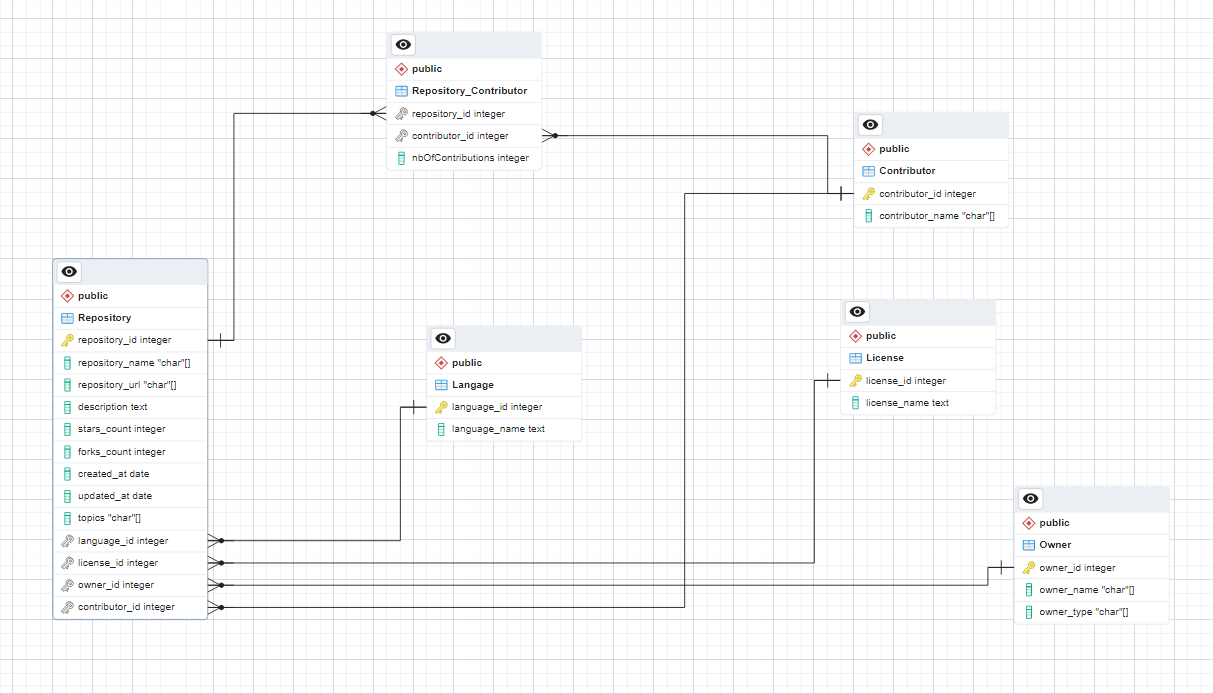

# Modèle Physique de Données

Cette étape va consister à faire des scripts créer et gérer la base de données

In [17]:
import pandas as pd
import pyodbc

pip install pyodbc

In [2]:
# Lecture du fichier CSV
data = pd.read_csv('data_data.csv')

In [3]:
connexion = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='LAPTOP-L0N961TQ\SQLEXPRESS',
    Database='GitHub_Store'
)
cursor = connexion.cursor()


## Create the Contributor table

In [4]:
# Create the Contributor table
cursor.execute('''
    CREATE TABLE Contributor (
        contributor_id INT PRIMARY KEY IDENTITY(1,1),
        contributor_name NVARCHAR(50)
    )
''')
connexion.commit()
print("The Contributor table has been created successfully.")

The Contributor table has been created successfully.


## Create the License table

In [5]:
# Create the License table
cursor.execute('''
    CREATE TABLE License (
        license_id INT PRIMARY KEY IDENTITY(1,1),
        license_name NVARCHAR(255)
    )
''')
connexion.commit()
print("The License table has been created successfully.")

The License table has been created successfully.


## Create the Language table

In [6]:
# Create the Language table
cursor.execute('''
    CREATE TABLE Language (
        language_id INT PRIMARY KEY IDENTITY(1,1),
        language_name NVARCHAR(50)
    )
''')
connexion.commit()
print("The Language table has been created successfully.")


The Language table has been created successfully.


## Create the Owner table

In [7]:
# Create the Owner table
cursor.execute('''
    CREATE TABLE Owner (
        owner_id INT PRIMARY KEY IDENTITY(1,1),
        owner_name NVARCHAR(50),
        owner_type NVARCHAR(50)
    )
''')
connexion.commit()
print("The Owner table has been created successfully.")

The Owner table has been created successfully.


## Create the Repository table

In [8]:
# Create the Repository table with a defined length for the description column
cursor.execute('''
    CREATE TABLE Repository (
        repository_id INT PRIMARY KEY,
        repository_name NVARCHAR(255),
        description NVARCHAR(4000),  
        repository_url NVARCHAR(255),
        language_id INT,
        license_id INT,
        owner_id INT,
        stars_count INT,
        forks_count INT,
        created_at DATETIME,
        updated_at DATETIME,
        topics NVARCHAR(MAX),
        CONSTRAINT FK_Repository_Language FOREIGN KEY (language_id) REFERENCES Language (language_id),
        CONSTRAINT FK_Repository_License FOREIGN KEY (license_id) REFERENCES License (license_id),
        CONSTRAINT FK_Repository_Owner FOREIGN KEY (owner_id) REFERENCES Owner (owner_id)
    )
''')
connexion.commit()
print("The Repository table has been created successfully.")

The Repository table has been created successfully.


## Insert data into the License table

### Create the Repository_Contributor table

In [9]:
# Create the Repository_Contributor table
cursor.execute('''
    CREATE TABLE Repository_Contributor (
        repository_id INT,
        contributor_id INT,
        contributions INT,
        CONSTRAINT FK_Repository_Contributor_Repository FOREIGN KEY (repository_id) REFERENCES Repository (repository_id),
        CONSTRAINT FK_Repository_Contributor_Contributor FOREIGN KEY (contributor_id) REFERENCES Contributor (contributor_id)
    )
''')
connexion.commit()
print("The Repository_Contributor table has been created successfully.")

The Repository_Contributor table has been created successfully.


In [10]:
# Insert data into the License table
license_names = data['license'].dropna().unique()
for license_name in license_names:
    cursor.execute("SELECT license_name FROM License WHERE license_name = ?", license_name)
    if not cursor.fetchone():
        cursor.execute("INSERT INTO License (license_name) VALUES (?)", license_name)
connexion.commit()
print("Data has been inserted into the License table.")

Data has been inserted into the License table.


### Insert data into the Owner table

In [11]:
# Insert data into the Owner table
owner_data = data[['owner_name', 'owner_type']].drop_duplicates()

for _, row in owner_data.iterrows():
    owner_name = row['owner_name']
    owner_type = row['owner_type']

    cursor.execute("SELECT owner_name FROM Owner WHERE owner_name = ?", owner_name)
    if not cursor.fetchone():
        cursor.execute("INSERT INTO Owner (owner_name, owner_type) VALUES (?, ?)", owner_name, owner_type)

connexion.commit()
print("Data has been inserted into the Owner table.")

Data has been inserted into the Owner table.


### Insert data into the Contributor table

In [12]:
# Insert data into the Contributor table
contributors = data['contributor_name'].unique()
for contributor in contributors:
    cursor.execute("SELECT contributor_name FROM Contributor WHERE contributor_name = ?", contributor)
    if not cursor.fetchone():
        cursor.execute("INSERT INTO Contributor (contributor_name) VALUES (?)", contributor)
connexion.commit()
print("Data has been inserted into the Contributor table.")

Data has been inserted into the Contributor table.


### Insert data into the Language table

In [13]:
# Insert data into the Language table
languages = data['language'].dropna().unique()
for language in languages:
    cursor.execute("SELECT Language_name FROM Language WHERE language_name = ?", language)
    if not cursor.fetchone():
        cursor.execute("INSERT INTO Language (language_name) VALUES (?)", language)
connexion.commit()
print("Data has been inserted into the Language table.")

Data has been inserted into the Language table.


In [14]:
# Select all data from the License table
select_query = "SELECT * FROM Repository_Contributor"
cursor.execute(select_query)

# Fetch all rows from the result set
rows = cursor.fetchall()

# Iterate over the rows and print the data
for row in rows:
    print(row)

### Insert data to Repository

In [15]:
import json
from datetime import datetime

# Helper function to parse topics string to a list
def parse_topics(topics_str):
    if topics_str == "[]":
        return ["NO TOPIC"]
    else:
        return [topic.strip() for topic in topics_str.strip("[]").split(",")]

# Insert data into the Repository table
for row in data.itertuples():
    # Check if the repository already exists in the table
    cursor.execute("SELECT COUNT(*) FROM Repository WHERE repository_id = ?", row[1])  # Use index 1 for repository_id
    if cursor.fetchone()[0] == 0:
        # Convert datetime strings to datetime objects
        created_at = datetime.strptime(row[11], "%Y-%m-%d %H:%M:%S")  # Use index 11 for created_at
        updated_at = datetime.strptime(row[12], "%Y-%m-%d %H:%M:%S")  # Use index 12 for updated_at
        
        # Parse topics string to a list of topic names
        topics = parse_topics(row[6])  # Use index 6 for topics
        
        # Convert the list of topic names to a JSON string
        topics_json = json.dumps(topics)
        
        cursor.execute('''
            INSERT INTO Repository (
                repository_id, repository_name, description, repository_url, language_id, license_id, owner_id,
                stars_count, forks_count, created_at, updated_at, topics
            )
            VALUES (?, ?, ?, ?, (SELECT language_id FROM Language WHERE language_name = ?), 
            (SELECT license_id FROM License WHERE license_name = ?), 
            (SELECT owner_id FROM Owner WHERE owner_name = ?), ?, ?, ?, ?, ?)
        ''', row[1], row[2], row[8], row[3], row[4], row[5], row[14], row[9], row[10], created_at, updated_at, topics_json)
connexion.commit()
print("Data has been inserted into the Repository table.")

Data has been inserted into the Repository table.


### Insert data into the Repository_Contributor table

In [28]:
# Insert data into the Repository_Contributor table
for row in data.itertuples():
    repository_id = row.repository_id
    contributor_name = row.contributor_name
    contributions = row.contributions

    # Check if the contributor already exists in the Contributor table
    cursor.execute("SELECT contributor_id FROM Contributor WHERE contributor_name = ?", contributor_name)
    contributor_result = cursor.fetchone()

    # If the contributor exists, use the existing contributor_id
    if contributor_result:
        contributor_id = contributor_result[0]
    else:
        # If the contributor doesn't exist, insert them into the Contributor table and get the generated contributor_id
        cursor.execute("INSERT INTO Contributor (contributor_name) VALUES (?)", contributor_name)
        connection.commit()
        contributor_id = cursor.lastrowid

    # Insert the data into the Repository_Contributor table using repository_id, contributor_id, and contributions
    cursor.execute('''
        INSERT INTO Repository_Contributor (repository_id, contributor_id, contributions)
        VALUES (?, ?, ?)
    ''', repository_id, contributor_id, contributions)

connexion.commit()
print("Data has been inserted into the Repository_Contributor table.")

Data has been inserted into the Repository_Contributor table.


### Create Indexes for tables

In [29]:
# Add an index on the contributor_id column
cursor.execute('''
    CREATE INDEX IX_Contributor_contributor_id
    ON Contributor (contributor_id)
''')

# Add an index on the contributor_name column
cursor.execute('''
    CREATE INDEX IX_Contributor_contributor_name
    ON Contributor (contributor_name)
''')


# Add an index on the language_id column
cursor.execute('''
    CREATE INDEX IX_Language_language_id
    ON Language (language_id)
''')

# Add an index on the language_name column
cursor.execute('''
    CREATE INDEX IX_Language_language_name
    ON Language (language_name)
''')


# Add an index on the license_id column
cursor.execute('''
    CREATE INDEX IX_License_license_id
    ON License (license_id)
''')
# Add an index on the license_name column
cursor.execute('''
    CREATE INDEX IX_License_license_name
    ON License (license_name)
''')



# Add an index on the owner_id column
cursor.execute('''
    CREATE INDEX IX_Owner_owner_id
    ON Owner (owner_id)
''')

# Add an index on the owner_name column
cursor.execute('''
    CREATE INDEX IX_Owner_owner_name
    ON Owner (owner_name)
''')


# Add an index on the repository_id column
cursor.execute('''
    CREATE INDEX IX_Repository_repository_id
    ON Repository (repository_id)
''')
# Add an index on the repository_name column
cursor.execute('''
    CREATE INDEX IX_Repository_repository_name
    ON Repository (repository_name)
''')


# Add an index on the repository_id column
cursor.execute('''
    CREATE INDEX IX_Repository_Contributor_repository_id
    ON Repository_Contributor (repository_id)
''')

# Add an index on the contributor_id column
cursor.execute('''
    CREATE INDEX IX_Repository_Contributor_contributor_id
    ON Repository_Contributor (contributor_id)
''')

connexion.commit()
print("Indexes have been created for tables.")

Indexes have been created for tables.


In [30]:
# Close the cursor and connection
cursor.close()
connexion.close()